# Compare projected ellipticity of TNG galaxies to SLACS and A3D galaxies.

In [1]:
import pandas as pd 
import numpy as np 
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
data_slacs = pd.read_csv('./tableA1.txt', delim_whitespace=True, comment='#', header=None, on_bad_lines='skip')
qobs_slacs = data_slacs[9].values.astype('float')
qobs_slacs = np.where(qobs_slacs < 0, np.nan, qobs_slacs)
qobs_slacs = np.where(qobs_slacs > 1, np.nan, qobs_slacs)

/tmp/ipykernel_1857090/2227673326.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_slacs = pd.read_csv('./tableA1.txt', delim_whitespace=True, comment='#', header=None, on_bad_lines='skip')


In [3]:
# data_a3d = pd.read_csv('./tableA2.txt', delim_whitespace=True, comment='#', header=None, on_bad_lines='skip')
# qobs_a3d = data_a3d[2].values.astype('float')
# qobs_a3d = np.where(qobs_a3d < 0, np.nan, qobs_a3d)
# qobs_a3d = np.where(qobs_a3d > 1, np.nan, qobs_a3d)

In [4]:
def ellipticity2axis_ratio(e):
    return (1-e)/(1+e)

data_sim = np.load('../06-make_kin_mock_data/kin_mock_data/data_oblate.npy')
qobs_sim = data_sim[1, :]

data_apdx = np.load('../appdxB_axi_vs_sph_jam/beta_1_oblate.npy')
qobs_apdx = data_apdx[-1, :]

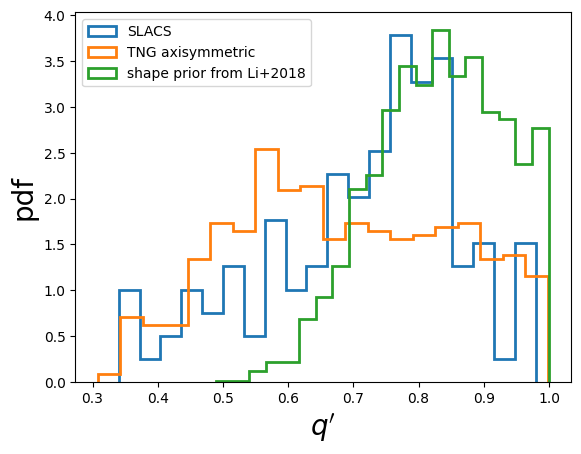

In [5]:
plt.hist(qobs_slacs, bins = 20, density = True, histtype='step', lw=2, label = 'SLACS')
# plt.hist(qobs_a3d, bins = 20, density = True, histtype='step', lw=2, label = 'ATLAS3D')
plt.hist(qobs_sim, bins = 20, density = True, histtype='step', lw=2, label = 'TNG axisymmetric')
plt.hist(qobs_apdx, bins = 20, density = True, histtype='step', lw=2, label = 'shape prior from Li+2018')
plt.legend()
plt.xlabel("$q'$", size = 20)
plt.ylabel('pdf', size = 20)
plt.show()

In [6]:
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d

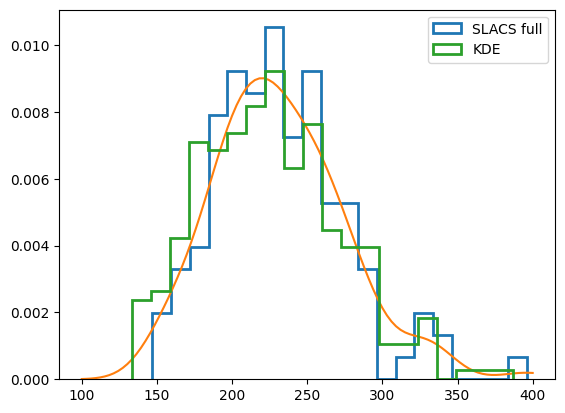

In [7]:
sigma_slacs = data_slacs[11].values.astype('float')
sigma_slacs = np.where(sigma_slacs < 0, np.nan, sigma_slacs)
plt.hist(sigma_slacs, bins = 20, density = True, histtype='step', lw=2, label = 'SLACS full')

sigma_slacs = sigma_slacs[np.isfinite(sigma_slacs)]

kde = gaussian_kde(sigma_slacs)

def draw_from_pdf(x, y, num):
    cdf = np.cumsum(y) / np.cumsum(y)[-1]
    inv_cdf = interp1d(x=cdf, y=x, fill_value='extrapolate')
    random_num = np.random.uniform(0, 1, num)
    var_rm = inv_cdf(random_num)
    return var_rm

sigma_sample = np.linspace(100, 400, 100)
sigma_kde = kde(sigma_sample)
plt.plot(sigma_sample, sigma_kde)

sigma_draw = draw_from_pdf(sigma_sample, sigma_kde, 300)
plt.hist(sigma_draw, histtype='step', lw=2, density = True, bins = 20, label='KDE')
plt.legend()